In [21]:
import importlib
import gui
import people
import astar
importlib.reload(gui)
importlib.reload(people)
importlib.reload(astar)
from gui import GUI
from people import PeopleList
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pandas as pd

<module 'gui' from 'd:\\vscode\\python_individual\\full_escape\\ABM\\Lingfeng_copy\\gui.py'>

<module 'people' from 'd:\\vscode\\python_individual\\full_escape\\ABM\\Lingfeng_copy\\people.py'>

<module 'astar' from 'd:\\vscode\\python_individual\\full_escape\\ABM\\Lingfeng_copy\\astar.py'>

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [27]:
import time as real_time  # import real time

# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
#barrier_set = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 7), (22, 10), (23, 13)]
barrier_set = [(0, 0), (27, 17), (26, 8), (23, 6), (24, 11)]
#barrier_set = [(0, 0), (27, 17), (26, 8), (22, 8), (23, 9)]
#barrier_set = [(0, 0), (27, 17), (26, 8)]
# = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 7)]
# barrier_set = [(0, 0), (27, 17), (26, 8)]  # -> No obstacles

delta_time = 0.005
percent_threshold = 50  # the percentage of people being moved out
initial_people_count = None
recorded_time = False

# Build GUI
gui = GUI()
gui.add_barrier(barrier_set)
gui.update_gui()


# Build PeopleList saving each people object
people_list = PeopleList()
# Build direction matrix
people_list.direction_matrix(barrier_set)
# Assign groups if don't want to use default group just comment this line
#group_split = {4: 1, 3: 2, 2: 5}
#people_list.assign_groups(group_split)
time = 0

# Initial each people
for people in people_list.list:
    gui.add_line(people, people_list.list, people.group_id)
    gui.add_oval(people.loc[0] - people.r, people.loc[1] - people.r,
                 people.loc[0] + people.r, people.loc[1] + people.r, people.id)
gui.update_gui()

initial_people_count = len(people_list.list)

# Move
start_time = real_time.time() 

while people_list.list:  # while there are people in the room
    
    i = 0
    while i < len(people_list.list):
        gui.del_line(people_list.list[i].group_id)
        gui.del_oval(people_list.list[i].id)

        if people_list.list[i].loc[0] > 1040:  # delete people if it goes out of room
            people_list.list.pop(i)
            continue
        i += 1

    # Check the percentage of people who have moved out
    remaining_people_count = len(people_list.list)
    moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

    if not recorded_time and moved_out_percentage >= percent_threshold:
        print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
        recorded_time = True

    people_list.move(barrier_set, delta_time=delta_time, A=2000, B=-0.08, threshold_ped=1.4, threshold_obs=120,
                     threshold_group=2, q_A=1, q_R=1, beta1=4, beta2=2, beta3=2)  # ped movement
    
    

    for people in people_list.list:  # update position
        gui.add_oval(int(people.loc[0]) - people.r,
                     int(people.loc[1]) - people.r, int(people.loc[0]) + people.r,
                     int(people.loc[1]) + people.r, people.id)
        gui.add_line(people, people_list.list, people.group_id)

    #time = real_time.time() - start_time  # update time
    time += delta_time 
    gui.update_time(str(round(time, 3)))
    gui.update_gui()


gui.start()


Time when 50% of people moved out: 18.765 seconds


In [24]:
time 


37.73500000000085

##  define the function 

In [25]:
import time as real_time  # import real time

# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
#barrier_set = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 7), (22, 10), (23, 13)]
barrier_set = [(0, 0), (27, 17), (26, 8)]

'''
length is more meaning here, it can represent the length of the panel , also the distance between the panel and the door
'''

#barrier_set = [(0, 0), (27, 17), (26, 8), (20, 4), (21, 13)]
length=barrier_set[-1][1]-barrier_set[-2][1]
sim_run=20

def panel_run(barrier_set, length, sim_run=20):

    time_list=[]
    sim_count=0


    while sim_count<=sim_run:

        delta_time = 0.005
        percent_threshold = 80  # the percentage of people being moved out
        initial_people_count = None
        recorded_time = False


        # Build PeopleList saving each people object
        people_list = PeopleList()
        # Build direction matrix
        people_list.direction_matrix(barrier_set)
        # Assign groups
        #group_split = {4: 1, 3: 2, 2: 5}
        #people_list.assign_groups(group_split)
        time = 0


        initial_people_count = len(people_list.list)

        # Move
        start_time = real_time.time() 

        while people_list.list:
            i = 0
            while i < len(people_list.list):

                if people_list.list[i].loc[0] > 1040:  # delete people if it goes out of room
                    people_list.list.pop(i)
                    continue
                i += 1

            # Check the percentage of people who have moved out
            remaining_people_count = len(people_list.list)
            moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

            if not recorded_time and moved_out_percentage >= percent_threshold:
                #print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
                recorded_time = True
                #time_list.append(time)


            people_list.move(barrier_set, delta_time=delta_time, A=2000, B=-0.08, threshold_ped=1.4, threshold_obs=120,
                            threshold_group=2, q_A=1, q_R=1, beta1=4, beta2=2, beta3=2)  # ped movement

            #time = real_time.time() - start_time  # update time
            time += delta_time
            
            if time>200:
                time=200
                break
        
        time_list.append(time) 
        sim_count+=1

    mean_time = np.mean(time_list)
    std_time = np.std(time_list,ddof=1)
    n = len(time_list)
    t_critical = stats.t.ppf(0.975, df=n-1)

    margin_error = t_critical * (std_time / np.sqrt(n))
    ci_lower = mean_time - margin_error
    ci_upper = mean_time + margin_error

    return length, mean_time, ci_lower, ci_upper 


'\nlength is more meaning here, it can represent the length of the panel , also the distance between the panel and the door\n'

In [26]:
panel_run(barrier_set,length,sim_run=3)

(-9, 32.5549999999982, 32.5549999999982, 32.5549999999982)

In [73]:
# for panel simulation by changing the length of the barrier； 


initial_y_for_first_barrier = 8  # 对应 (22, 8)
initial_y_for_second_barrier = 9  # 对应 (23, 9)
length_list=[]
mean_time_list=[]
ci_lower_list=[]
ci_upper_list=[]

# 计算起始和结束的偏移量
for offset in range(0, min(initial_y_for_first_barrier - 3, 14 - initial_y_for_second_barrier) + 1):
    new_y_for_first_barrier = initial_y_for_first_barrier - offset
    new_y_for_second_barrier = initial_y_for_second_barrier + offset

    # 确保 first_barrier 的 y 值不低于 3，second_barrier 的 y 值不高于 14
    if new_y_for_first_barrier >= 3 and new_y_for_second_barrier <= 14:
        # 更新 barrier_set 的复制版本以避免修改原始列表
        new_barrier_set = barrier_set[:]
        new_barrier_set[3] = (new_barrier_set[3][0], new_y_for_first_barrier)
        new_barrier_set[4] = (new_barrier_set[4][0], new_y_for_second_barrier)

        
    
    length=new_barrier_set[-1][1]-new_barrier_set[-2][1]
    sim_run=20
    sim_result=panel_run(barrier_set=new_barrier_set,length=length,sim_run=sim_run)
    length_list.append(sim_result[0])
    mean_time_list.append(sim_result[1])
    ci_lower_list.append(sim_result[2])
    ci_upper_list.append(sim_result[3])




In [74]:
length_list
mean_time_list
ci_lower_list
ci_upper_list

[1, 3, 5, 7, 9, 11]

[3.1170966852278936,
 3.2869020870753696,
 3.417194332395281,
 4.276221082324073,
 4.995589608237857,
 5.132670493352981]

[3.1096756388741458,
 3.280625863767753,
 3.4116428461238577,
 4.028117940930055,
 4.930167290851282,
 5.064440528551856]

[3.1245177315816415,
 3.293178310382986,
 3.422745818666704,
 4.524324223718092,
 5.061011925624433,
 5.200900458154106]

In [71]:
singel_panel=pd.DataFrame({'length':length_list,'mean_time':mean_time_list,'ci_lower':ci_lower_list,'ci_upper':ci_upper_list})
singel_panel


,length,mean_time,ci_lower,ci_upper
0,1,3.147152,3.141362,3.152943
1,3,3.309356,3.302600,3.316113
2,5,3.458245,3.452247,3.464243
3,7,3.635273,3.630426,3.640119
4,9,3.681859,3.677928,3.685791
5,11,4.410139,4.025521,4.794758


<Figure size 1000x500 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Time with Individual Confidence Intervals')

Text(0.5, 0, 'Panel Length')

Text(0, 0.5, 'Average Time')

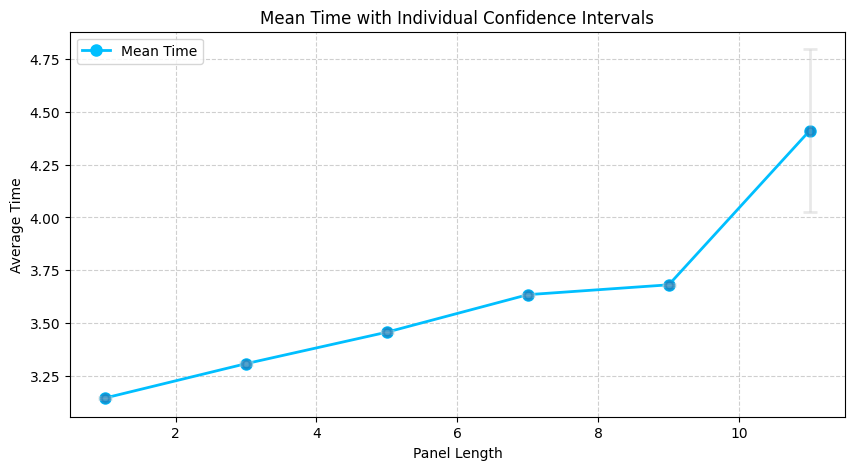

In [112]:
error = [singel_panel['mean_time'] - singel_panel['ci_lower'], singel_panel['ci_upper'] - singel_panel['mean_time']]

plt.figure(figsize=(10, 5))
plt.plot(singel_panel['length'], singel_panel['mean_time'], 'o-', color='deepskyblue', linewidth=2, markersize=8, label='Mean Time')
plt.errorbar(singel_panel['length'], singel_panel['mean_time'], yerr=error, fmt='o', capsize=5, elinewidth=2, markeredgewidth=2, ecolor='lightgray', alpha=0.5)

plt.title('Mean Time with Individual Confidence Intervals')
plt.xlabel('Panel Length')
plt.ylabel('Average Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

In [64]:
group_panel=pd.DataFrame({'length':length_list,'mean_time':mean_time_list,'ci_lower':ci_lower_list,'ci_upper':ci_upper_list})
group_panel 

,length,mean_time,ci_lower,ci_upper
0,1,9.261761,9.237309,9.286212
1,3,9.357017,9.332053,9.381982
2,5,10.355095,10.338194,10.371995
3,7,10.548611,10.528781,10.568440
4,9,10.397870,10.381070,10.414670
5,11,10.793797,10.777840,10.809754


In [24]:
import time as real_time  # import real time

# [(start_boundary), (end_boundary), (door), (start_obstacle1), (end_obstacle1), (start_obstacle2), (end_obstacle2)...]
#barrier_set = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 7), (22, 10), (23, 13)]

barrier_set = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 13)]
length=barrier_set[-1][1]-barrier_set[-2][1]


def panel_percent(barrier_set,percent_threshold=70):


    delta_time = 0.005
    percent_threshold = percent_threshold  # the percentage of people being moved out
    initial_people_count = None
    recorded_time = False


    # Build PeopleList saving each people object
    people_list = PeopleList()
    # Build direction matrix
    people_list.direction_matrix(barrier_set)
    # Assign groups
    group_split = {4: 1, 3: 2, 2: 5}
    people_list.assign_groups(group_split)
    time = 0


    initial_people_count = len(people_list.list)

    # Move
    start_time = real_time.time() 

    while people_list.list:
        i = 0
        while i < len(people_list.list):

            if people_list.list[i].loc[0] > 1040:  # delete people if it goes out of room
                people_list.list.pop(i)
                continue
            i += 1

        # Check the percentage of people who have moved out
        remaining_people_count = len(people_list.list)
        moved_out_percentage = ((initial_people_count - remaining_people_count) / initial_people_count) * 100

        if not recorded_time and moved_out_percentage >= percent_threshold:
            print(f"Time when {percent_threshold}% of people moved out: {round(time, 3)} seconds") 
            recorded_time = True
            return time 

        people_list.move(barrier_set, delta_time=delta_time, A=2000, B=-0.08, threshold_ped=1.4, threshold_obs=120,
                        threshold_group=2, q_A=1, q_R=1, beta1=4, beta2=2, beta3=2)  # ped movement

        time = real_time.time() - start_time  # update time
    
    
    




In [26]:
panel_percent(barrier_set,percent_threshold=30) 

Time when 30% of people moved out: 6.957 seconds


6.957154750823975

####  change the distance between door and obstacle (especially for panel)

In [104]:
#barrier_set = [(0, 0), (27, 17), (26, 8), (22, 4), (23, 13)]
# based on the length of the panel is 7

dispan_length_list=[]
dispan_mean_time_list=[]
dispan_ci_lower_list=[]
dispan_ci_upper_list=[]

steps = 12  

# 当前障碍物的索引，假设你知道 (22, 4) 是 barrier_set[3]，(23, 13) 是 barrier_set[4]
index_first_barrier = 3
index_second_barrier = 4


for step in range(0, steps + 1):
    
    new_x_first = barrier_set[index_first_barrier][0] - step
    new_x_second = barrier_set[index_second_barrier][0] - step
    distance=26-new_x_first
   
    new_barrier_set = barrier_set[:]  
    new_barrier_set[index_first_barrier] = (new_x_first, new_barrier_set[index_first_barrier][1])
    new_barrier_set[index_second_barrier] = (new_x_second, new_barrier_set[index_second_barrier][1])

    # 打印每步的结果
    #print(f"Step {step}: {distance}") 
    #print(f"Step {step}: {new_barrier_set}")

    sim_run=20
    sim_result=panel_run(barrier_set=new_barrier_set,length=distance,sim_run=sim_run)
    dispan_length_list.append(sim_result[0])
    dispan_mean_time_list.append(sim_result[1])
    dispan_ci_lower_list.append(sim_result[2])
    dispan_ci_upper_list.append(sim_result[3])
    



In [109]:
dispan_df=pd.DataFrame({'distance':dispan_length_list,'mean_time':dispan_mean_time_list,'ci_lower':dispan_ci_lower_list,'ci_upper':dispan_ci_upper_list})

<Figure size 1000x500 with 0 Axes>

<ErrorbarContainer object of 3 artists>

Text(0.5, 1.0, 'Mean Time with Confidence Intervals by Distance')

Text(0.5, 0, 'Distance')

Text(0, 0.5, 'Mean Time')

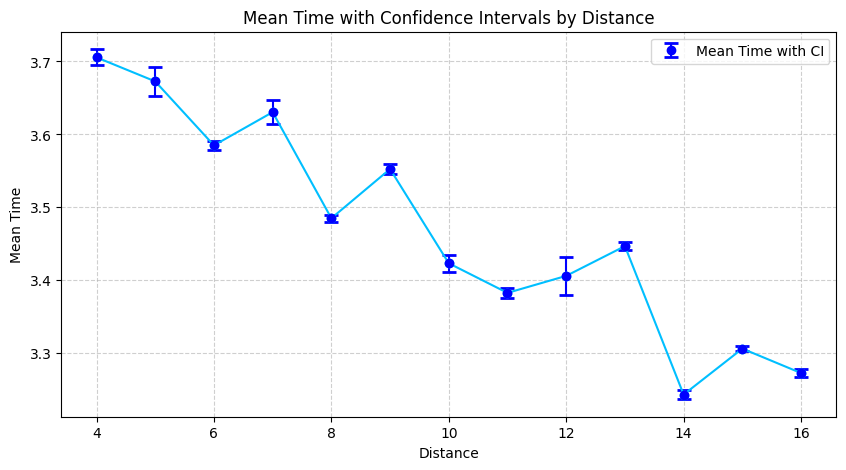

In [111]:
error_lower = dispan_df['mean_time'] - dispan_df['ci_lower']
error_upper = dispan_df['ci_upper'] - dispan_df['mean_time']
errors = [error_lower, error_upper]
plt.figure(figsize=(10, 5))
plt.errorbar(dispan_df['distance'], dispan_df['mean_time'], yerr=errors, fmt='o', capsize=5, capthick=2, color='blue', label='Mean Time with CI')

plt.plot(dispan_df['distance'], dispan_df['mean_time'], linestyle='-', marker='o', color='deepskyblue')

plt.title('Mean Time with Confidence Intervals by Distance')
plt.xlabel('Distance')
plt.ylabel('Mean Time')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

### About Pailar 